In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import math
import random
from PIL import Image
from notebooks.useful_functions_notebook_14to18 import *
from notebooks.useful_functions_notebook_8to13 import variable_consistancy_check, mass_not_preserved_percentage_decrease, check_branch_length, analyze_data
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))

# (1) Draw sample from generated merger tree dataset and visualize & analyze
if it does not work first try, run the cell again

You must specify either a given number of branches or a threshold, generating random merger tree without any specifications:


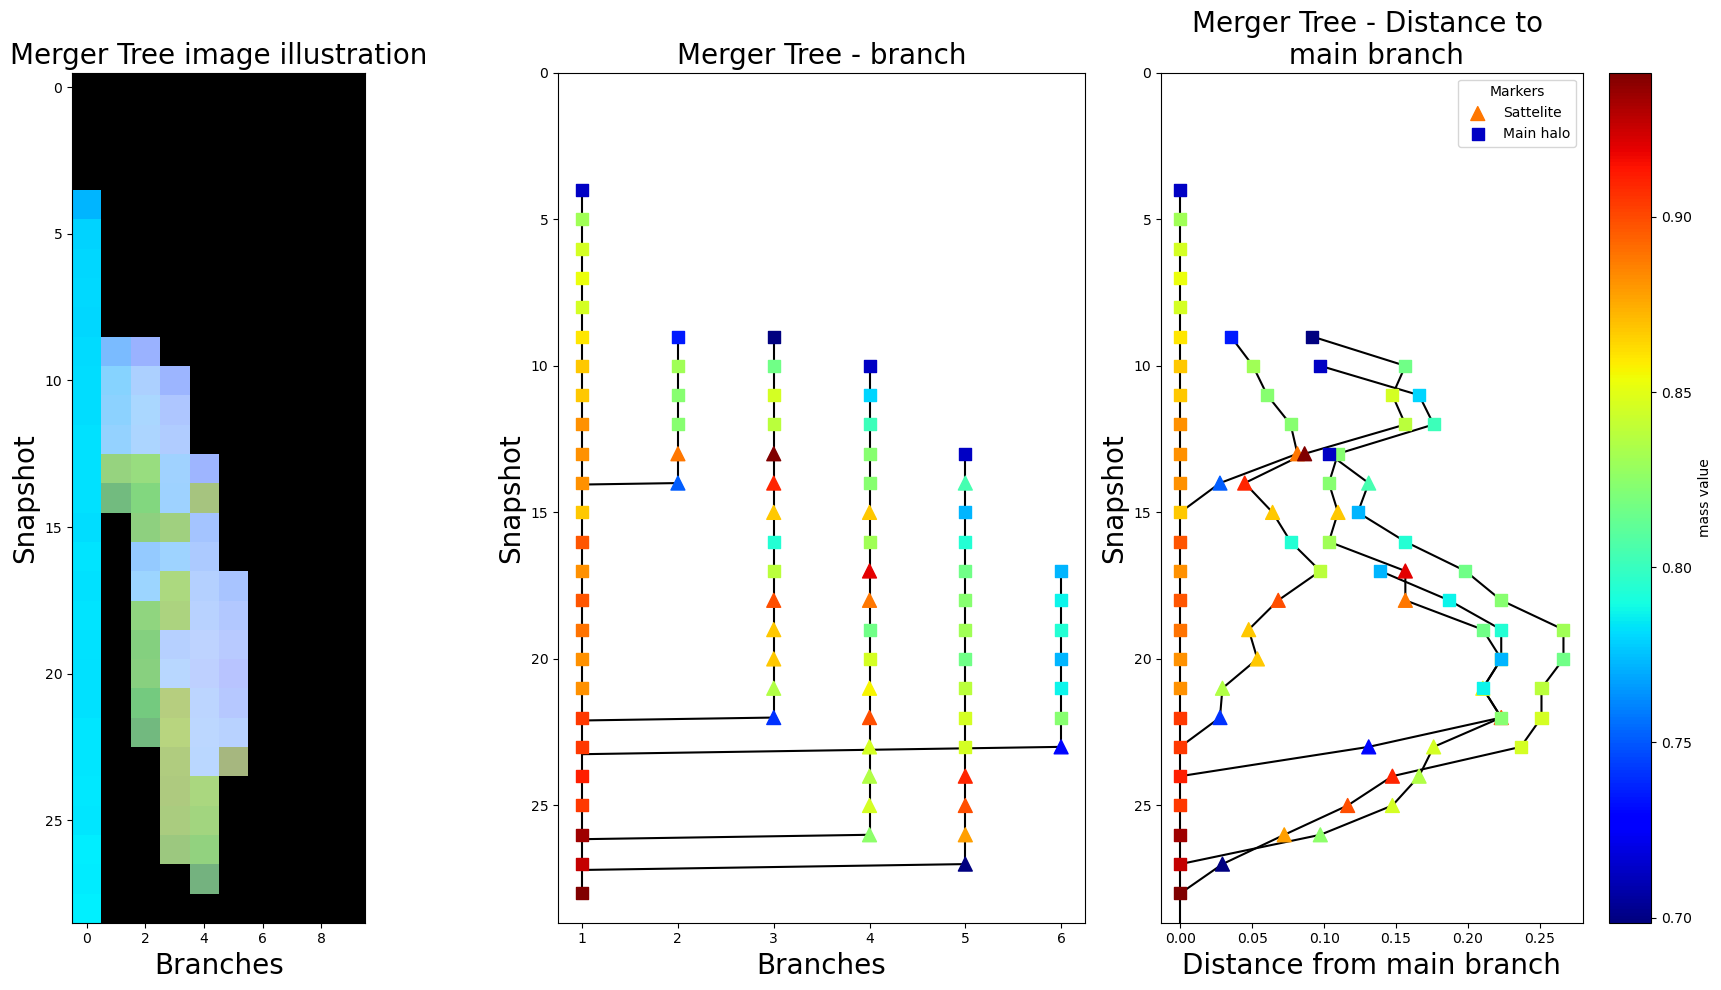



Percentage of consistant images = 100.00%
MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 29
perc of occurences where mass is not preserved = 34.52% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 19
perc of occurences where mass is not preserved = 22.62% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 4
perc of occurences where mass is not preserved = 4.76% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 3
perc of occurences where mass is not preserved = 3.57% vs. 0.32% in training data







DISTANCE:
total distance progentors = 59 
number of occurences where distance increase (not preserved) = 25
perc of occurences where mass increase (not preserved) = 42.37% vs. 49.67% in training data


total branches where the la

In [4]:
generated_data = torch.load("notebooks/diffusion_notebook/diffusion_2.0/diffusion2.0_consistant_postporcessed_images.pt", map_location = "cpu")

sample = draw_sample_given_branch_and_complexity(generated_data)

plot_side_by_side(sample)
consistent, inconsistent = check_consistency(sample)
variable_consistancy_check(sample, False)
avg_branch = check_branch_length(sample)

# (2) Extract a sample from the generated merger tree dataset given of number of branches

Sampling a generated merger tree with 10 branches


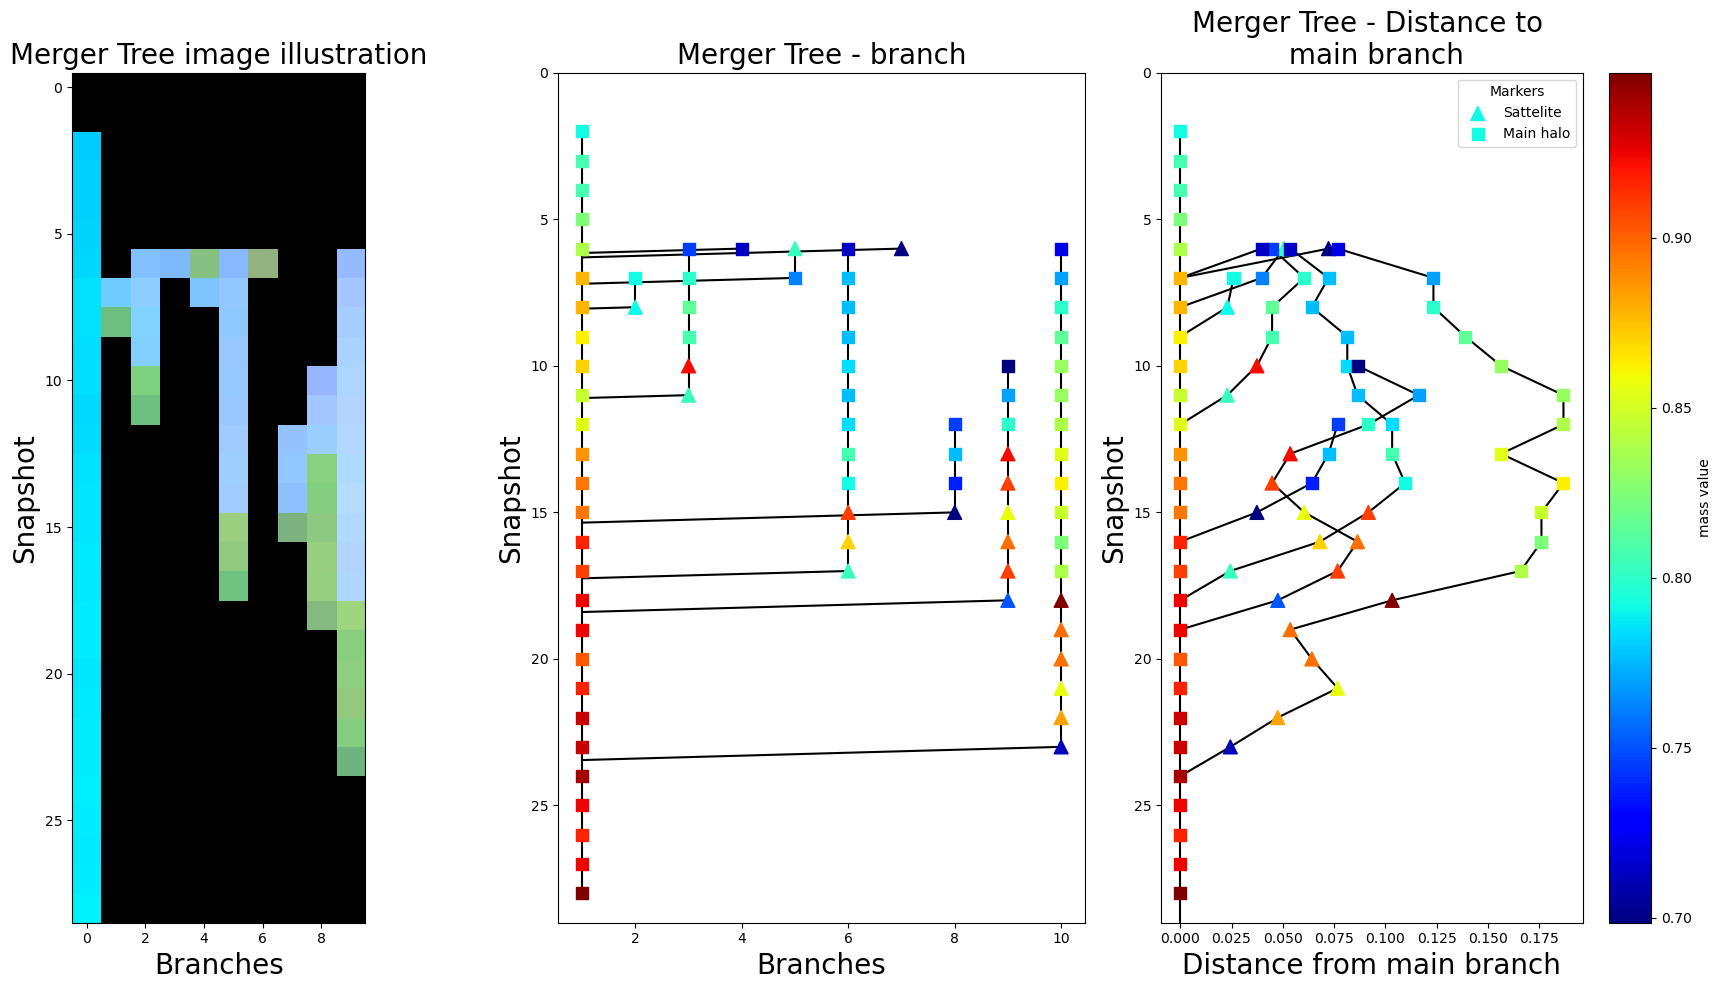

In [5]:
generated_data = torch.load("notebooks/diffusion_notebook/diffusion_2.0/diffusion2.0_consistant_postporcessed_images.pt", map_location = "cpu")


num_branches = 10
sample = draw_sample_given_branch_and_complexity(generated_data, num_branches)

plot_side_by_side(sample)


# (3) Extract a sample from the generated merger tree dataset given complexity


Generating merger tree with less than 40 in complexity

Picked random sample number 21930 out of 38536 potential samples

average number of branches in the image = 5.00 vs. 7.12 in training data
Average branch length = 8.00 vs. 9.06 in training data
Number of nonzero entries (progenitors) = 40.00 vs. 64.55 in training data





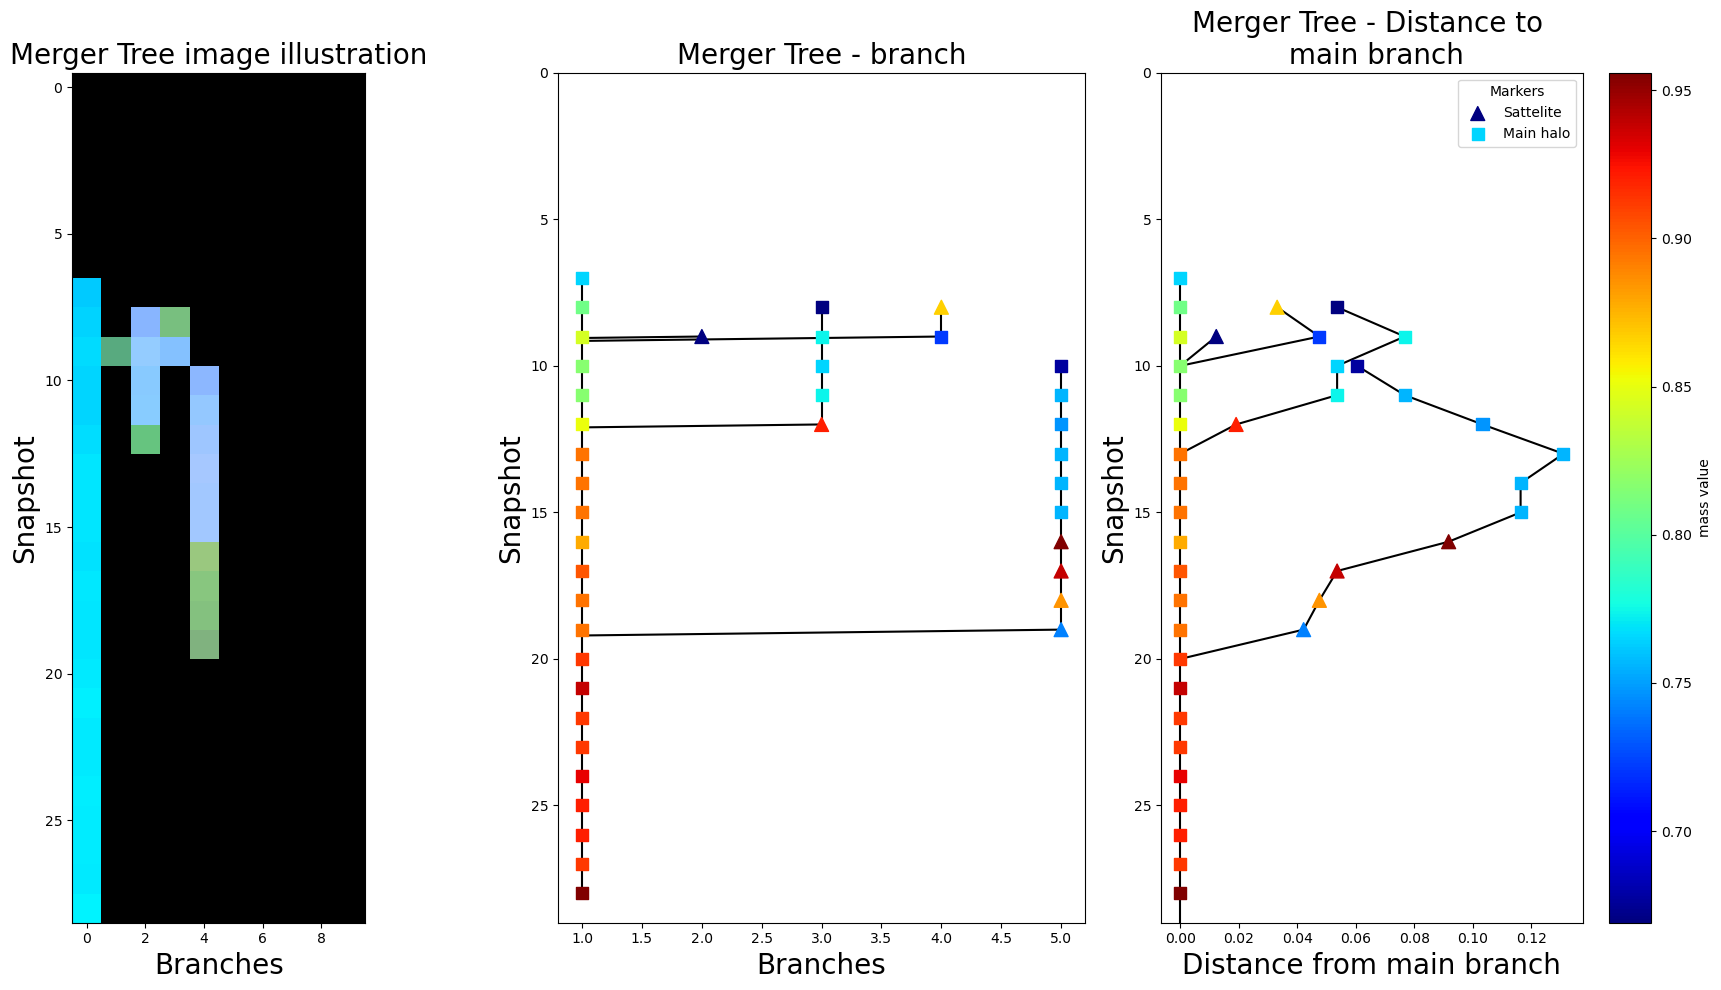

In [6]:
sample = draw_sample_given_branch_and_complexity(generated_data, higher_than = False, threshold = 40)
plot_side_by_side(sample)

# (4) Extract a sample from the generated merger tree dataset given number of branches and complexity


Sampling a generated merger tree with 10 branches
Generating merger tree with less than 50 in complexity

Picked random sample number 1631 out of 3087 potential samples

average number of branches in the image = 10.00 vs. 7.12 in training data
Average branch length = 4.80 vs. 9.06 in training data
Number of nonzero entries (progenitors) = 48.00 vs. 64.55 in training data





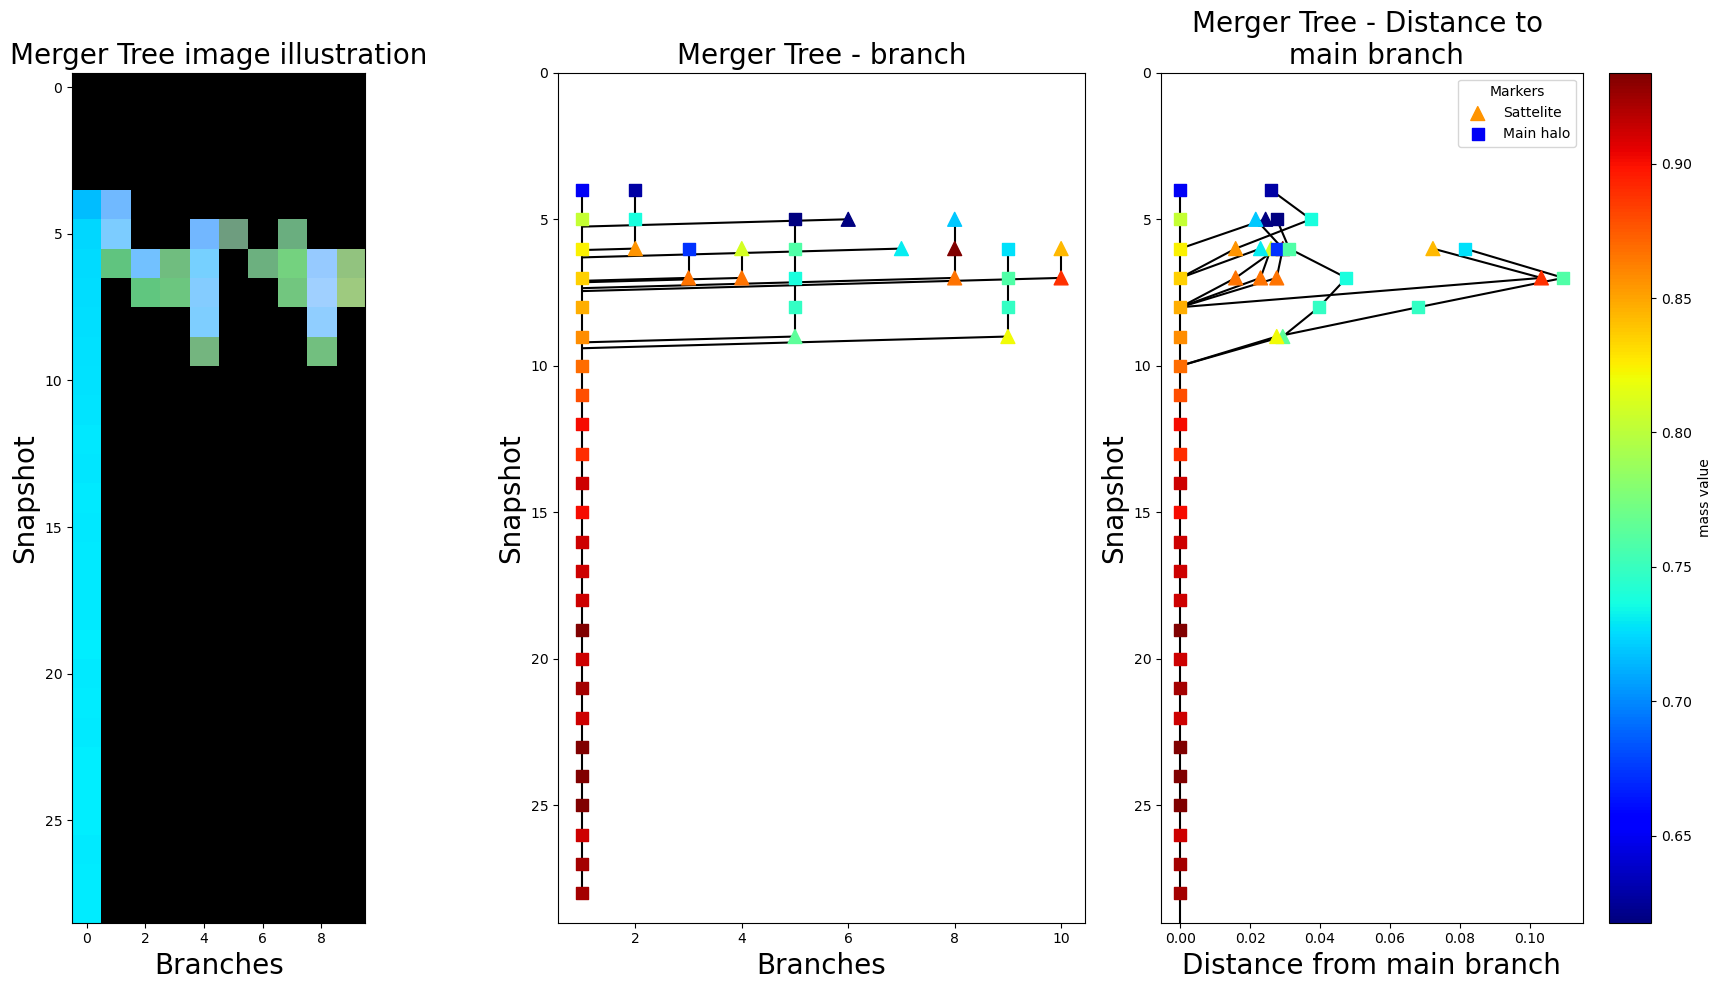

In [7]:
generated_data = torch.load("notebooks/diffusion_notebook/diffusion_2.0/diffusion2.0_consistant_postporcessed_images.pt", map_location = "cpu")

sample = draw_sample_given_branch_and_complexity(generated_data, 10, 50, higher_than = False)
plot_side_by_side(sample)

# (5) Analyze generated merger tree dataset
- consistency is evaluated on all merger trees
- the rest of the analysis is completed on only consistent merger trees



Percentage of consistant images = 100.00%
MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 809135
perc of occurences where mass is not preserved = 31.87% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 535471
perc of occurences where mass is not preserved = 21.09% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 159547
perc of occurences where mass is not preserved = 6.28% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 63209
perc of occurences where mass is not preserved = 2.49% vs. 0.32% in training data







DISTANCE:
total distance progentors = 1604382 
number of occurences where distance increase (not preserved) = 732207
perc of occurences where mass increase (not preserved) = 45.64% vs. 49.67% in training data


t

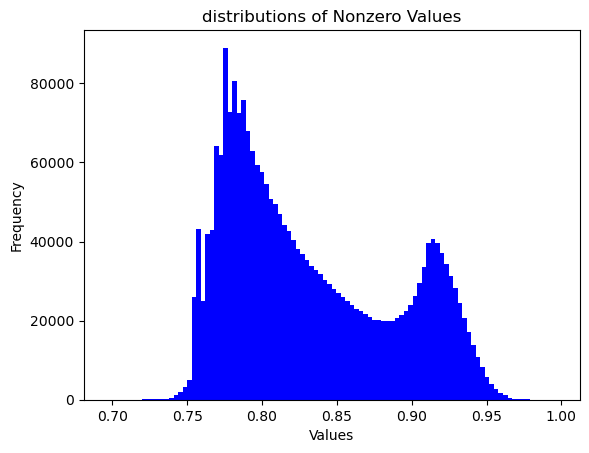

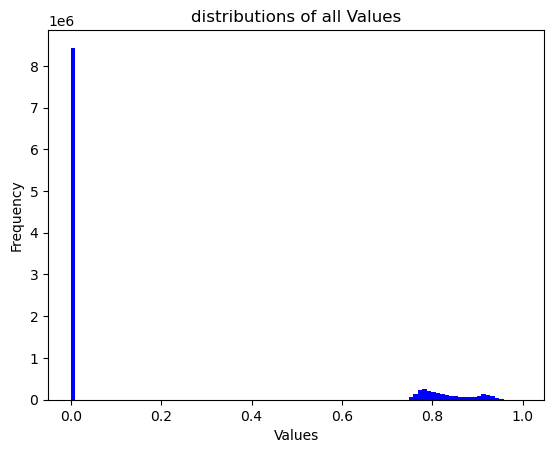

number of nonzero values = 2411709
Generated images:


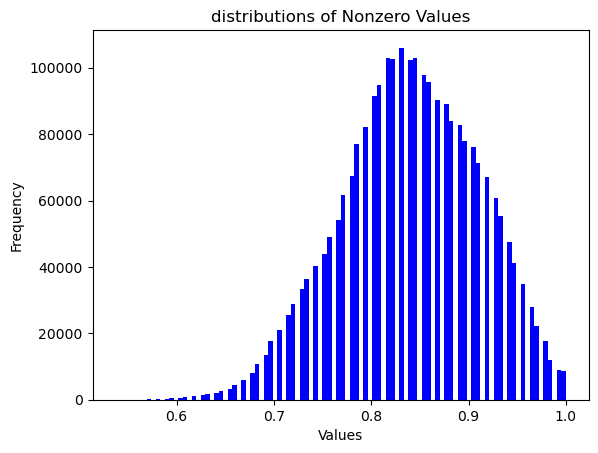

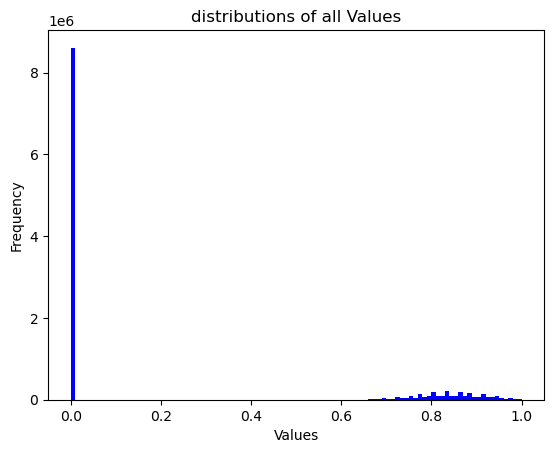

number of nonzero values = 2567811


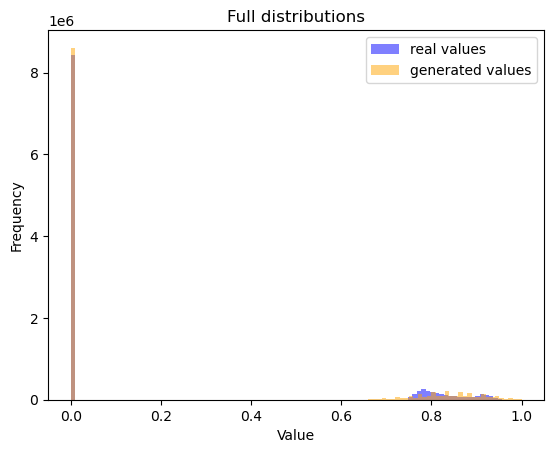

Full distribution:
KS Statistic: 0.039158133906682435
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0006:
The distributions are significantly different (reject H0), KS statistic 0.0392 > 0.0006


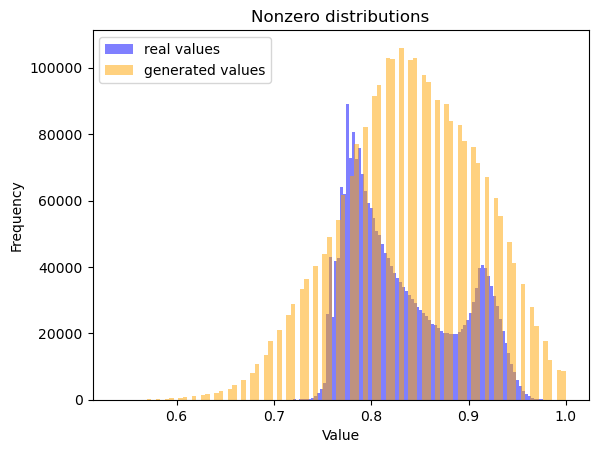

Nonzero distribution:
KS Statistic: 0.15560914390256564
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0012:
The distributions are significantly different (reject H0), KS statistic 0.1556 > 0.0012


(0.039158133906682435, 0.15560914390256564)

In [6]:
generated_data = torch.load("notebooks/diffusion_notebook/diffusion_2.0/diffusion2.0_consistant_postporcessed_images.pt", map_location = "cpu")
original = torch.load('notebooks/data/dataset_normalized_consistent_only.pt')

consistent, inconsistent = check_consistency(generated_data)
variable_consistancy_check(consistent, False)
avg_branch = check_branch_length(consistent)
ks_test(original, consistent, dim = 1)

# (6) Generate new sample and visualize & analyze

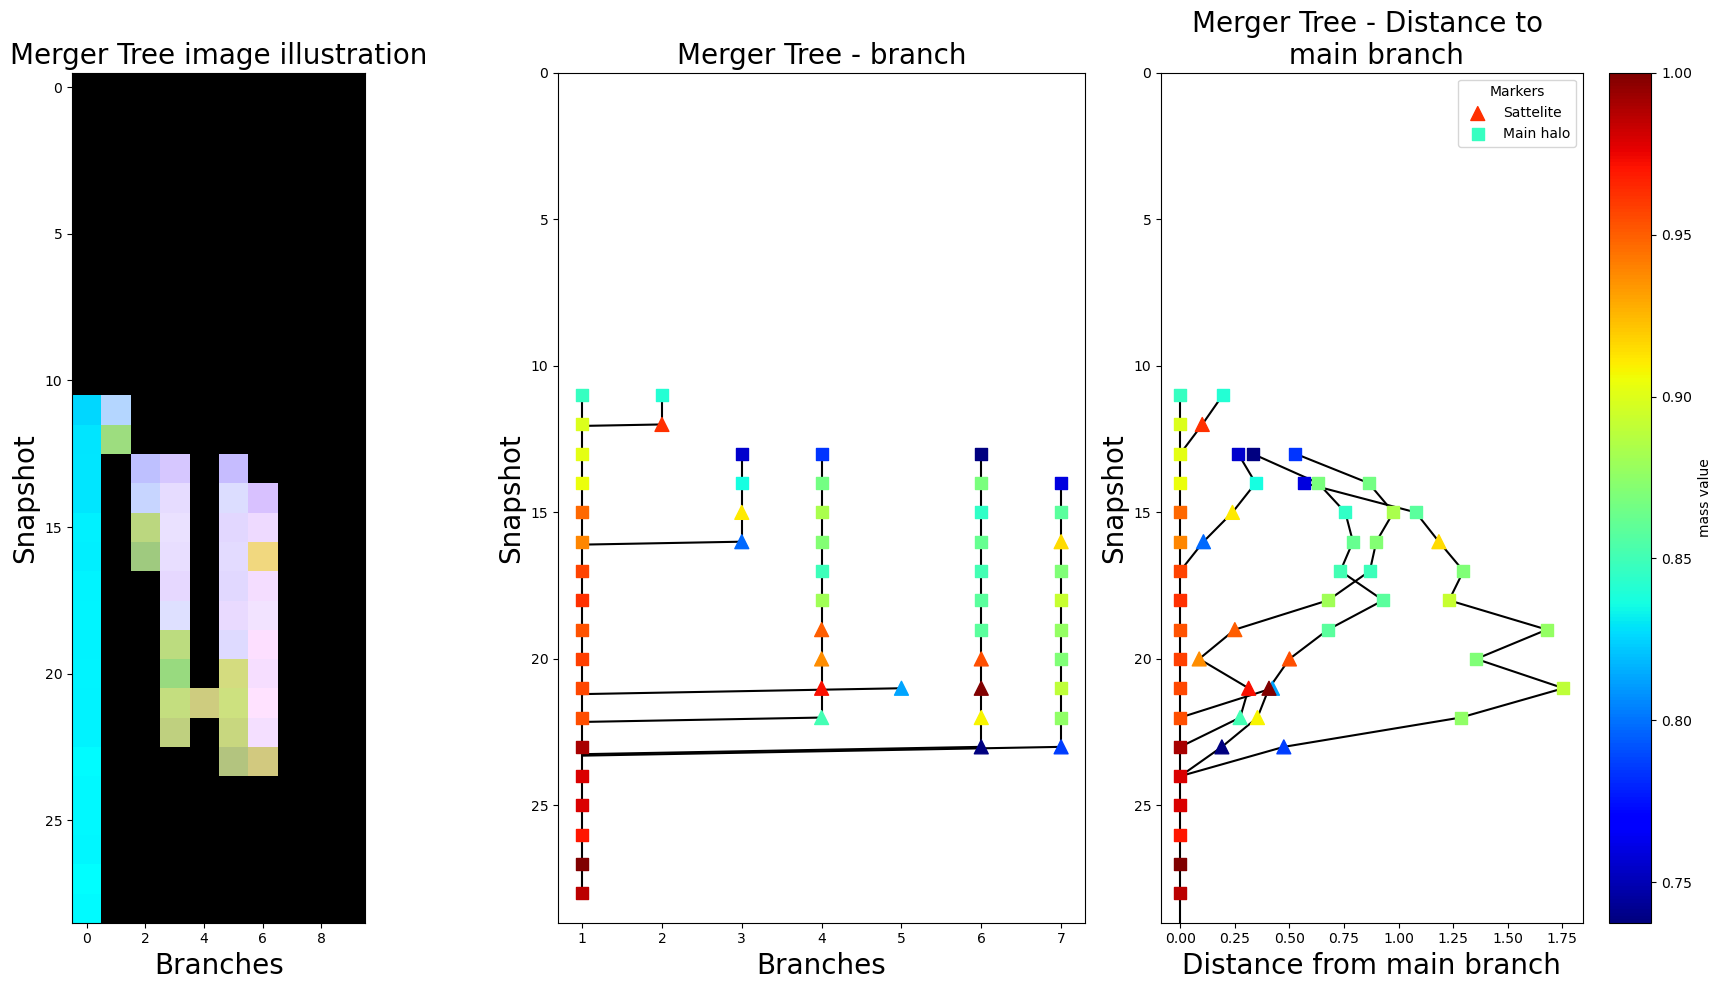



Percentage of consistant images = 100.00%
MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 22
perc of occurences where mass is not preserved = 39.29% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 15
perc of occurences where mass is not preserved = 26.79% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 4
perc of occurences where mass is not preserved = 7.14% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 0
perc of occurences where mass is not preserved = 0.00% vs. 0.32% in training data







DISTANCE:
total distance progentors = 38 
number of occurences where distance increase (not preserved) = 19
perc of occurences where mass increase (not preserved) = 50.00% vs. 49.67% in training data


total branches where the la

In [46]:
T = 1000
model = UNet()
model_path = "notebooks/diffusion_notebook/diffusion_2.0/diffusion_new_model2.0.pt"

saved_model = torch.load(model_path, map_location = 'cpu')
model.load_state_dict(saved_model)

t = torch.Tensor([T])
diffusion = Diffusion(T)
generated_test1 = diffusion.sample(model, 1)

transform = transforms.Resize((29, 10))
generated_test_trans = transform(generated_test1.to(dtype=torch.float))
generated_test_norm = normalize(generated_test_trans, True, [0, 1, 2])

generated_test = transform_diffusion_image(generated_test_norm, d_thresh = 0.21, m_tresh = 0.5, s_low = 0.19, s_high = 0.72)

plot_side_by_side(generated_test)
consistent, inconsistent = check_consistency(generated_test)
variable_consistancy_check(generated_test, False)
avg_branch = check_branch_length(generated_test)